# Inflation Method: Ammann-Beenker tiling

### All libraries that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh
from typing import Tuple, List
import networkx as nx
from IPython.display import HTML
import matplotlib.animation as animation

we can define decomposed elements of the quasi-crystal: 
* Right-angled triangle
* rhombus with the smaller angle 45 degree

In [2]:
# Rule: the length of shorter side of the right trangle is equal to
# the length of any side of a rhombus.

equal_a = 1

def triangle(coordinate: Tuple[float, float], l_side):
    vertex = [tuple(coordinate), (coordinate[0]+l_side*np.sqrt(2),coordinate[1]), (coordinate[0]+l_side/np.sqrt(2), coordinate[1]+l_side/np.sqrt(2))]
    return vertex

def rhombus(coordinate: Tuple[float, float], l_side):
    vertex = [tuple(coordinate), 
              (coordinate[0]+l_side, coordinate[1]), 
              (coordinate[0]+l_side/np.sqrt(2)+l_side,coordinate[1]+l_side/np.sqrt(2)), 
              (coordinate[0]+l_side/np.sqrt(2),coordinate[1]+l_side/np.sqrt(2))]
    return vertex

To check if they are what we want

In [3]:
a = rhombus([0,0], 1)
print(a)

[(0, 0), (1, 0), (1.7071067811865475, 0.7071067811865475), (0.7071067811865475, 0.7071067811865475)]


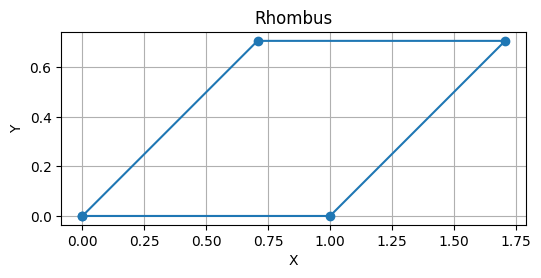

In [4]:
# Rhombus vertices
# Order the vertices to form the rhombus
ordered_vertices = [a[0], a[1], a[2], a[3], a[0]]

# Extract x and y coordinates
x, y = zip(*ordered_vertices)

# Plot the rhombus
plt.figure(figsize=(6, 6))
plt.plot(x, y, '-o')  # '-o' adds points at the vertices and connects them with lines
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the rhombus looks correct
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rhombus')
plt.grid(True)
plt.show()

#### To exactly match the dissected tiles with the original sized tile with matched all the markings, we need to define a function to transform the tiles.

In [5]:
def transform_point_ini(vertices, theta, trans_x, trans_y, origin=(0,0), invert_y=False):
    # Convert tuple to list for modification
    vertices = list(vertices)
    #print(origin)
    # Translate the point to the origin
    vertices[0] -= origin[0]
    vertices[1] -= origin[1]

    # Inversion or not?
    if invert_y:
        vertices[0] = -vertices[0]

    # Rotation matrix
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotated_x = cos_theta * vertices[0] - sin_theta * vertices[1]
    rotated_y = sin_theta * vertices[0] + cos_theta * vertices[1]

    # Translate the rotated point
    translated_x = rotated_x + trans_x + origin[0]
    translated_y = rotated_y + trans_y + origin[1]
    
    return (translated_x, translated_y)


In [6]:
def transform_point(vertices, theta, trans_x, trans_y, origin=(0,0), invert_y=False):
    # Convert tuple to list for modification
    vertices = list(vertices)
    #print(origin)
    # Translate the point to the origin
    #vertices[0] -= origin[0]
    #vertices[1] -= origin[1]

    # Inversion or not?
    if invert_y:
        vertices[0] = -vertices[0]

    # Rotation matrix
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotated_x = cos_theta * vertices[0] - sin_theta * vertices[1]
    rotated_y = sin_theta * vertices[0] + cos_theta * vertices[1]

    # Translate the rotated point
    translated_x = rotated_x + trans_x + origin[0]
    translated_y = rotated_y + trans_y + origin[1]
    
    return (translated_x, translated_y)


##### The inverse of the above operation

In [7]:
def reverse_transform_point(vertices, theta, trans_x, trans_y, origin=(0,0), invert_y=False):
    # Convert tuple to list for modification
    vertices = list(vertices)
    #print(vertices)
    #print(origin)
    # Translate the point to the origin
    vertices[0] -= origin[0]
    vertices[1] -= origin[1]

    # Reverse the translation
    vertices[0] -= trans_x
    vertices[1] -= trans_y
    #print(vertices)
    # Reverse the rotation
    cos_theta = np.cos(-theta)
    sin_theta = np.sin(-theta)
    rotated_x = cos_theta * vertices[0] - sin_theta * vertices[1]
    rotated_y = sin_theta * vertices[0] + cos_theta * vertices[1]

    # Inversion or not?
    if invert_y:
        rotated_x = -rotated_x

    # Translate back to the original position
    #translated_x = rotated_x + origin[0]
    translated_x = rotated_x
    #translated_y = rotated_y + origin[1]
    translated_y = rotated_y
    
    return (translated_x, translated_y)

### Test the transformations in inflated triangle

In [8]:
# Test tri1 in the inflated trangle
points = [(0,0), (np.sqrt(2), 0), (np.sqrt(2)/2, np.sqrt(2)/2)]
transformed_points = [transform_point(p, 5*np.pi/4, 1,1) for p in points]
print(transformed_points)

[(1.0, 1.0), (-2.220446049250313e-16, 0.0), (0.9999999999999999, 0.0)]


In [9]:
# Test tri2 in the inflated trangle
transformed_points = [transform_point(x, 0, 1+np.sqrt(2), 0, invert_y=True) for x in points]
print(transformed_points)

[(2.414213562373095, 0.0), (0.9999999999999998, 0.0), (1.7071067811865475, 0.7071067811865476)]


In [10]:
# Test tri3 in the inflated trangle
transformed_points = [transform_point(y, 3*np.pi/4, 2+np.sqrt(2)/2, np.sqrt(2)/2) for y in points]
print(transformed_points)

[(2.7071067811865475, 0.7071067811865476), (1.7071067811865475, 1.707106781186548), (1.7071067811865475, 0.7071067811865477)]


In [11]:
# Test r1 in the inflated trangle
points = [(0,0), (1, 0), (1+np.sqrt(2)/2, np.sqrt(2)/2), (np.sqrt(2)/2, np.sqrt(2)/2)]
[transform_point(i, 5*np.pi/4, 1+np.sqrt(2)/2, 1+np.sqrt(2)/2) for i in points]

[(1.7071067811865475, 1.7071067811865475),
 (0.9999999999999998, 1.0),
 (0.9999999999999998, 0.0),
 (1.7071067811865475, 0.7071067811865475)]

In [12]:
# Test r2 in the inflated trangle
[transform_point(x, 3*np.pi/4, 2+np.sqrt(2), 0) for x in points]

[(3.414213562373095, 0.0),
 (2.7071067811865475, 0.7071067811865476),
 (1.7071067811865475, 0.7071067811865475),
 (2.414213562373095, 1.1102230246251565e-16)]

### Test the transformations in the inflated rhombus

In [13]:
# Test tri1 in the inflated rhombus
points = [(0,0), (np.sqrt(2), 0), (np.sqrt(2)/2, np.sqrt(2)/2)]

[transform_point(i, 0, 1, 0) for i in points]

[(1.0, 0.0),
 (2.414213562373095, 0.0),
 (1.7071067811865475, 0.7071067811865476)]

In [14]:
# Test tri2 in the inflated rhombus
[transform_point(i, np.pi, 1+3*np.sqrt(2)/2, 1+np.sqrt(2)/2) for i in points]

[(3.121320343559643, 1.7071067811865475),
 (1.7071067811865477, 1.7071067811865477),
 (2.414213562373095, 1.0)]

In [15]:
# Test tri3 in the inflated rhombus
[transform_point(i, np.pi/4, 2+np.sqrt(2), 1, invert_y=True) for i in points]

[(3.414213562373095, 1.0),
 (2.414213562373095, -2.220446049250313e-16),
 (2.414213562373095, 1.0)]

In [16]:
# Test tri4 in the inflated rhombus
[transform_point(i, 5*np.pi/4, np.sqrt(2)/2, np.sqrt(2)/2, invert_y=True) for i in points]

[(0.7071067811865476, 0.7071067811865476),
 (1.707106781186548, 1.7071067811865475),
 (1.7071067811865475, 0.7071067811865475)]

In [17]:
# Test r1 in the inflated rhombus
points = [(0,0), (1, 0), (1+np.sqrt(2)/2, np.sqrt(2)/2), (np.sqrt(2)/2, np.sqrt(2)/2)]
points

[(0, 0),
 (1, 0),
 (1.7071067811865475, 0.7071067811865476),
 (0.7071067811865476, 0.7071067811865476)]

In [18]:
# Test r2 in the inflated rhombus
[transform_point(i, np.pi/2, 1+np.sqrt(2), 0) for i in points]

[(2.414213562373095, 0.0),
 (2.414213562373095, 1.0),
 (1.7071067811865475, 1.7071067811865475),
 (1.7071067811865475, 0.7071067811865476)]

In [19]:
# Test r3 in the inflated rhombus
[transform_point(i, 0, 1+np.sqrt(2), 1) for i in points]

[(2.414213562373095, 1.0),
 (3.414213562373095, 1.0),
 (4.121320343559642, 1.7071067811865475),
 (3.1213203435596424, 1.7071067811865475)]

### Define the inflation rules for triangle and rhombus

![My Image](diagrams\inflation_rule.png)

In [20]:
def inflate_triangle(coordinate: Tuple[float, float], l_side)-> List[Tuple[str, List[Tuple[float, float]]]]:
    """according to arXiv:math/0203252, we dissect the triangle into 3 triangles and two rhombus with side length = l_side"""
    vertice_tri = triangle(coordinate, l_side/(1+np.sqrt(2)))
    vertice_rhom = rhombus(coordinate, l_side/(1+np.sqrt(2)))
    #vert_enlarge = [((1+np.sqrt(2))*x, (1+np.sqrt(2))*y) for x, y in vertice_tri] 
    tri1 = [transform_point_ini(i, 5*np.pi/4, l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_tri]
    tri2 = [transform_point_ini(x, 0, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate, invert_y=True) for x in vertice_tri]
    tri3 = [transform_point_ini(y, 3*np.pi/4, (2+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for y in vertice_tri]
    r1 = [transform_point_ini(i, 5*np.pi/4, (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_rhom]
    r2 = [transform_point_ini(x, 3*np.pi/4, (2+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate) for x in vertice_rhom]
    return [('tri1', tri1), ('tri2', tri2), ('tri3', tri3), ('r1', r1), ('r2', r2)]

In [21]:
def inflate_rhombus(coordinate: Tuple[float, float], l_side) -> List[Tuple[str, List[Tuple[float, float]]]]:
    """according to arXiv:math/0203252, we dissect the rhombus into 4 triangles and 3 rhombus with side length = l_side"""
    vertice_tri = triangle(coordinate, l_side/(1+np.sqrt(2)))
    vertice_rhom = rhombus(coordinate, l_side/(1+np.sqrt(2)))
    tri1 = [transform_point_ini(i, 0, l_side/(1+np.sqrt(2)), 0) for i in vertice_tri]
    tri2 = [transform_point_ini(i, np.pi, (1+3*np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_tri]
    tri3 = [transform_point_ini(i, np.pi/4, (2+np.sqrt(2))*l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate, invert_y=True) for i in vertice_tri]
    tri4 = [transform_point_ini(i, 5*np.pi/4, (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate, invert_y=True) for i in vertice_tri]
    r1 = [transform_point_ini(i, 0, 0, 0, origin=coordinate) for i in vertice_rhom]
    r2 = [transform_point_ini(i, np.pi/2, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate) for i in vertice_rhom]
    r3 = [transform_point_ini(i, 0, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_rhom]
    return [('tri1', tri1), ('tri2', tri2), ('tri3', tri3), ('tri4', tri4), ('r1', r1), ('r2', r2), ('r3', r3)]

### Test Inflation functions

In [22]:
tiles = inflate_triangle((1, 1), 1)
print(tiles)

newt1 = [reverse_transform_point(p, 5*np.pi/4, 1/(1+np.sqrt(2)), 1/(1+np.sqrt(2))) for p in tiles[0][1]]
print(newt1)

[('tri1', [(1.4142135623730951, 1.4142135623730951), (0.9999999999999998, 1.0), (1.414213562373095, 1.0)]), ('tri2', [(2.0, 1.0), (1.414213562373095, 1.0), (1.7071067811865475, 1.2928932188134525)]), ('tri3', [(2.121320343559643, 1.2928932188134525), (1.7071067811865475, 1.7071067811865477), (1.7071067811865475, 1.2928932188134525)]), ('r1', [(1.7071067811865475, 1.7071067811865475), (1.414213562373095, 1.414213562373095), (1.414213562373095, 0.9999999999999999), (1.7071067811865475, 1.2928932188134525)]), ('r2', [(2.414213562373095, 1.0), (2.121320343559643, 1.2928932188134525), (1.7071067811865475, 1.2928932188134525), (2.0, 1.0)])]
[(-1.4142135623730951, -2.220446049250313e-16), (-0.8284271247461898, -2.7755575615628914e-16), (-1.1213203435596424, 0.29289321881345226)]


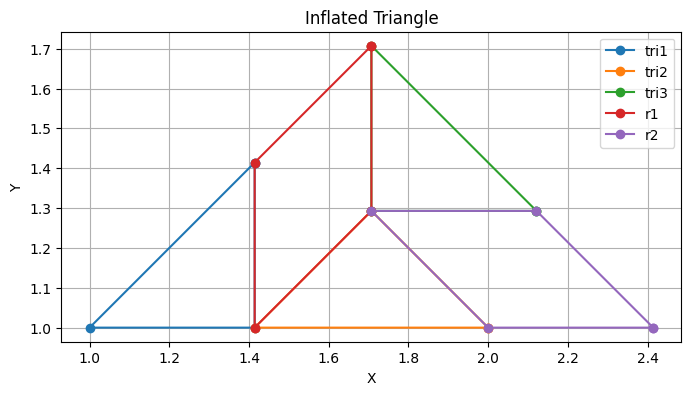

In [23]:
def plot_tile(vertices, label):
    # Extract x and y coordinates
    x, y = zip(*vertices)
    x = list(x) + [x[0]]  # Close the shape
    y = list(y) + [y[0]]  # Close the shape
    
    plt.plot(x, y, '-o', label=label)
plt.figure(figsize=(8, 8))

for tile_name, vertices in tiles:
    plot_tile(vertices, tile_name)

plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the shapes look correct
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Inflated Triangle')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
shapes = inflate_rhombus((1, 1), 1)
print(shapes)

print(shapes[0][1])

[('tri1', [(1.4142135623730951, 1.0), (2.0, 1.0), (1.7071067811865477, 1.2928932188134525)]), ('tri2', [(2.2928932188134525, 1.7071067811865475), (1.7071067811865475, 1.7071067811865477), (2.0, 1.4142135623730951)]), ('tri3', [(2.414213562373095, 1.4142135623730951), (2.0, 1.0), (2.0, 1.4142135623730951)]), ('tri4', [(1.2928932188134525, 1.2928932188134525), (1.707106781186548, 1.7071067811865477), (1.7071067811865477, 1.2928932188134525)]), ('r1', [(1.0, 1.0), (1.4142135623730951, 1.0), (1.7071067811865477, 1.2928932188134525), (1.2928932188134525, 1.2928932188134525)]), ('r2', [(2.0, 1.0), (2.0, 1.4142135623730951), (1.7071067811865475, 1.7071067811865477), (1.7071067811865475, 1.2928932188134525)]), ('r3', [(2.0, 1.4142135623730951), (2.414213562373095, 1.4142135623730951), (2.707106781186548, 1.7071067811865477), (2.2928932188134525, 1.7071067811865477)])]
[(1.4142135623730951, 1.0), (2.0, 1.0), (1.7071067811865477, 1.2928932188134525)]


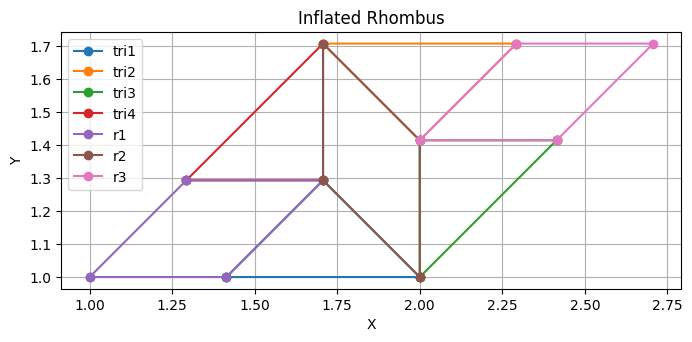

In [25]:
def plot_tile(vertices, label):
    # Extract x and y coordinates
    x, y = zip(*vertices)
    x = list(x) + [x[0]]  # Close the shape
    y = list(y) + [y[0]]  # Close the shape

    # Plot the shape
    plt.plot(x, y, '-o', label=label)


plt.figure(figsize=(8, 8))

for tile_name, vertices in shapes:
    plot_tile(vertices, tile_name)

plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the shapes look correct
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Inflated Rhombus')
plt.legend()
plt.grid(True)
plt.show()


### However, these functions persume that the original tiles are in the origin with fixed orientation, hence does not apply to several tiles that have different configurations i.e. rotated, inverted, or translated

In [26]:
def inflate_triangle_2(tile: List[Tuple[float, float]], ls_initial) -> List[List[Tuple[float, float]]]:
    inflate_shapes = [(name, [(x*(1+np.sqrt(2))*ls_initial, y*(1+np.sqrt(2))*ls_initial) for x, y in vertices]) for name, vertices in tile]
    all_tiles = []
    for i,j in enumerate(inflate_shapes):
        #print(j)
        if inflate_shapes[i][0] == "tri1":
            #print(j)
            newt1 = [reverse_transform_point(p, 5*np.pi/4, 0, 0, inflate_shapes[i][1][0]) for p in inflate_shapes[i][1]]
            #print(newt1)
            inflate1 = inflate_triangle(newt1[0], ls_initial)
            #print(inflate1)
            inflate11 = [(shape_name, [transform_point(p, 5*np.pi/4, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1])) for p in points]) for shape_name, points in inflate1]            
            #print(inflate11)
            all_tiles.extend(inflate11)
        elif inflate_shapes[i][0] == "tri2":
            #print(j)
            newt2 = [reverse_transform_point(p, 0, 0, 0, inflate_shapes[i][1][0], True) for p in inflate_shapes[i][1]]
            #print(newt2)
            inflate2 = inflate_triangle(newt2[0], ls_initial)
            #print(inflate2)
            inflate22 = [(shape_name, [transform_point(p, 0, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1]), True) for p in points]) for shape_name, points in inflate2]
            #print(inflate22)
            all_tiles.extend(inflate22)
        elif inflate_shapes[i][0] == "tri3":
            #print(j)
            newt3 = [reverse_transform_point(p, 3*np.pi/4, 0, 0, inflate_shapes[i][1][0]) for p in inflate_shapes[i][1]]
            #print(newt3)
            inflate3 = inflate_triangle(newt3[0], ls_initial)
            inflate33 = [(shape_name, [transform_point(p, 3*np.pi/4, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1])) for p in points]) for shape_name, points in inflate3]
            all_tiles.extend(inflate33)
        elif inflate_shapes[i][0] == "r1":
            newr1 = [reverse_transform_point(p, 5*np.pi/4, 0, 0, inflate_shapes[i][1][0]) for p in inflate_shapes[i][1]]
            inflate4 = inflate_rhombus(newr1[0], ls_initial)
            inflate44 = [(shape_name, [transform_point(p, 5*np.pi/4, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1])) for p in points]) for shape_name, points in inflate4]
            all_tiles.extend(inflate44)
        else:
            newr2 = [reverse_transform_point(p, 3*np.pi/4, 0, 0, inflate_shapes[i][1][0]) for p in inflate_shapes[i][1]]
            inflate5 = inflate_rhombus(newr2[0], ls_initial)
            inflate55 = [(shape_name, [transform_point(p, 3*np.pi/4, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1])) for p in points]) for shape_name, points in inflate5]
            all_tiles.extend(inflate55)
    return all_tiles

#### Test inflate_triangle_iterate function

In [27]:
rr = [('tri1', [(0.4142135623730951, 0.4142135623730951), (-1.6653345369377348e-16, 0.0), (0.41421356237309503, 0.0)]), ('tri2', [(1.0, 0.0), (0.4142135623730949, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('tri3', [(1.1213203435596426, 0.29289321881345254), (0.7071067811865475, 0.7071067811865477), (0.7071067811865476, 0.29289321881345254)]), ('r1', [(0.7071067811865476, 0.7071067811865476), (0.414213562373095, 0.4142135623730951), (0.414213562373095, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('r2', [(1.4142135623730951, 0.0), (1.1213203435596426, 0.29289321881345254), (0.7071067811865476, 0.2928932188134526), (1.0, 2.7755575615628914e-17)])]

In [28]:
a = inflate_triangle_2(rr, 1)

In [29]:
print(a)
b = inflate_triangle_2(a, 1)

[('tri1', [(0.9999999999999999, 0.4142135623730949), (1.0000000000000002, 1.0000000000000002), (0.7071067811865475, 0.7071067811865476)]), ('tri2', [(0.2928932188134523, 0.29289321881345254), (0.7071067811865476, 0.7071067811865477), (0.7071067811865475, 0.29289321881345254)]), ('tri3', [(0.4142135623730949, 0.0), (1.0, 0.0), (0.7071067811865475, 0.2928932188134523)]), ('r1', [(0.9999999999999999, 0.0), (1.0, 0.4142135623730949), (0.7071067811865475, 0.7071067811865476), (0.7071067811865475, 0.29289321881345254)]), ('r2', [(-2.220446049250313e-16, 0.0), (0.4142135623730949, 0.0), (0.7071067811865475, 0.2928932188134523), (0.2928932188134523, 0.29289321881345254)]), ('tri1', [(1.9999999999999998, 0.4142135623730951), (2.414213562373095, 0.0), (2.0, 0.0)]), ('tri2', [(1.414213562373095, 0.0), (2.0, 0.0), (1.7071067811865475, 0.2928932188134525)]), ('tri3', [(1.2928932188134523, 0.29289321881345254), (1.7071067811865475, 0.7071067811865477), (1.7071067811865475, 0.29289321881345254)]), ('

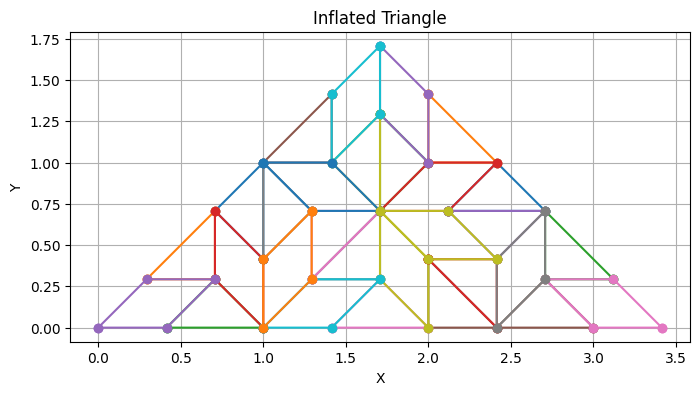

In [30]:
plt.figure(figsize=(8, 8))

for tile_name, vertices in a:
    plot_tile(vertices, tile_name)

plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the shapes look correct
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Inflated Triangle')
#plt.legend()
plt.grid(True)
plt.show()

##### Test the algorithm

In [31]:
def inflate_triangle_test(tile: List[Tuple[float, float]], ls_initial) -> List[List[Tuple[float, float]]]:
    inflate_shapes = [(name, [(x*(1+np.sqrt(2))*ls_initial, y*(1+np.sqrt(2))*ls_initial) for x, y in vertices]) for name, vertices in tile]
    all_tiles = []
    for i,j in enumerate(inflate_shapes):
        print(j)
        xxx = j
        newt1 = [reverse_transform_point(p, 5*np.pi/4, 0, 0, inflate_shapes[i][1][0]) for p in inflate_shapes[i][1]]
        print(newt1)
        inflate1 = inflate_triangle(newt1[0], ls_initial)
        print(inflate1)
        inflate11 = [(shape_name, [transform_point(p, 5*np.pi/4, 0, 0, (inflate_shapes[i][1][0][0], inflate_shapes[i][1][0][1])) for p in points]) for shape_name, points in inflate1]            
        print(inflate11)
        all_tiles.extend(inflate11)
    return xxx, newt1, inflate1, all_tiles

In [32]:
rrr = [('tri1', [(0.4142135623730951, 0.4142135623730951), (-1.6653345369377348e-16, 0.0), (0.41421356237309503, 0.0)])]

In [33]:
a = inflate_triangle_test(rrr, 1)

('tri1', [(1.0, 1.0), (-4.020473224963397e-16, 0.0), (0.9999999999999999, 0.0)])
[(-0.0, 0.0), (1.4142135623730954, -1.1102230246251565e-16), (0.7071067811865476, 0.7071067811865476)]
[('tri1', [(0.4142135623730951, 0.4142135623730951), (-1.6653345369377348e-16, 0.0), (0.41421356237309503, 0.0)]), ('tri2', [(1.0, 0.0), (0.4142135623730949, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('tri3', [(1.1213203435596426, 0.29289321881345254), (0.7071067811865475, 0.7071067811865477), (0.7071067811865476, 0.29289321881345254)]), ('r1', [(0.7071067811865476, 0.7071067811865476), (0.414213562373095, 0.4142135623730951), (0.414213562373095, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('r2', [(1.4142135623730951, 0.0), (1.1213203435596426, 0.29289321881345254), (0.7071067811865476, 0.2928932188134526), (1.0, 2.7755575615628914e-17)])]
[('tri1', [(0.9999999999999999, 0.4142135623730949), (1.0000000000000002, 1.0000000000000002), (0.7071067811865475, 0.7071067811865476)]), ('tri2', [(0.29

('tri2', [(2.414213562373095, 0.0), (0.9999999999999997, 0.0), (1.7071067811865472, 0.7071067811865475)])
[(-0.0, 0.0), (1.0000000000000004, -1.0000000000000002), (3.3306690738754696e-16, -1.0000000000000002)]
[('tri1', [(0.4142135623730951, 0.4142135623730951), (-1.6653345369377348e-16, 0.0), (0.41421356237309503, 0.0)]), ('tri2', [(1.0, 0.0), (0.4142135623730949, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('tri3', [(1.1213203435596426, 0.29289321881345254), (0.7071067811865475, 0.7071067811865477), (0.7071067811865476, 0.29289321881345254)]), ('r1', [(0.7071067811865476, 0.7071067811865476), (0.414213562373095, 0.4142135623730951), (0.414213562373095, 0.0), (0.7071067811865475, 0.2928932188134525)]), ('r2', [(1.4142135623730951, 0.0), (1.1213203435596426, 0.29289321881345254), (0.7071067811865476, 0.2928932188134526), (1.0, 2.7755575615628914e-17)])]
[('tri1', [(2.414213562373095, -0.5857864376269051), (2.414213562373095, 1.1775693440128312e-16), (2.1213203435596424, -0.292893

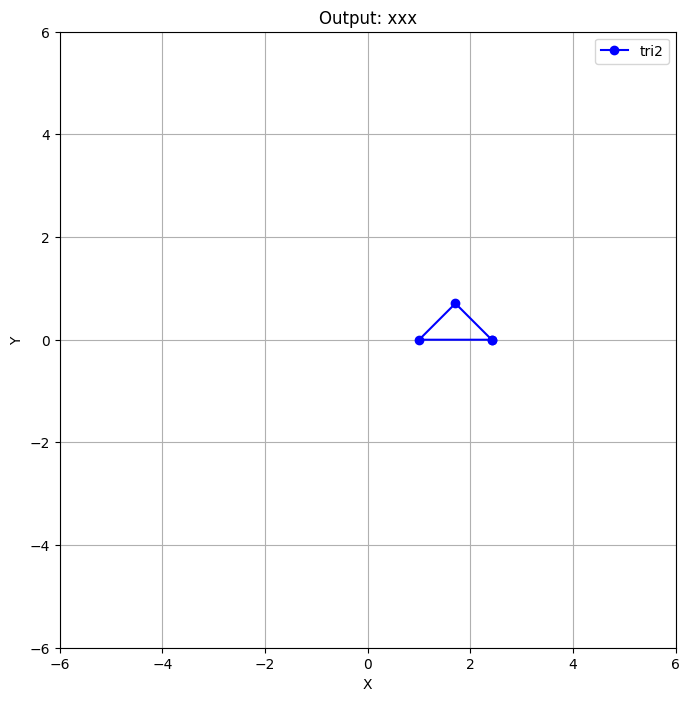

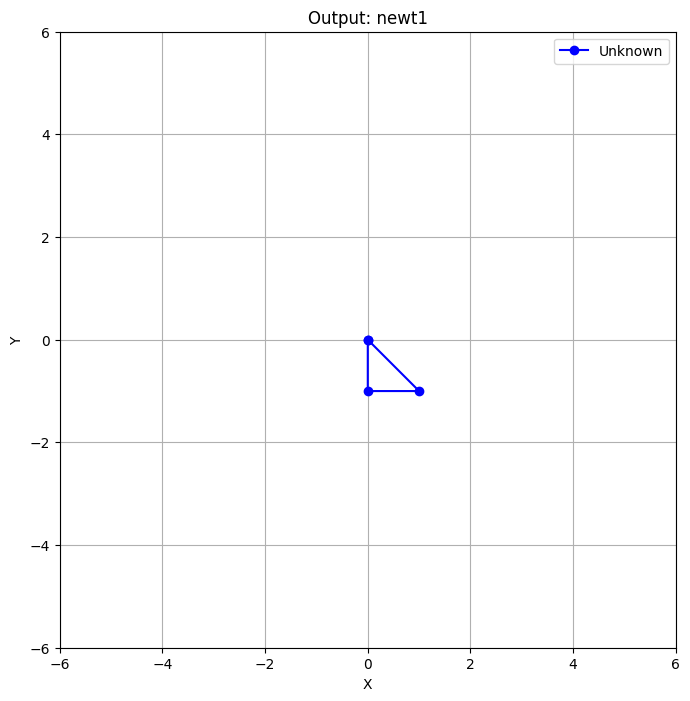

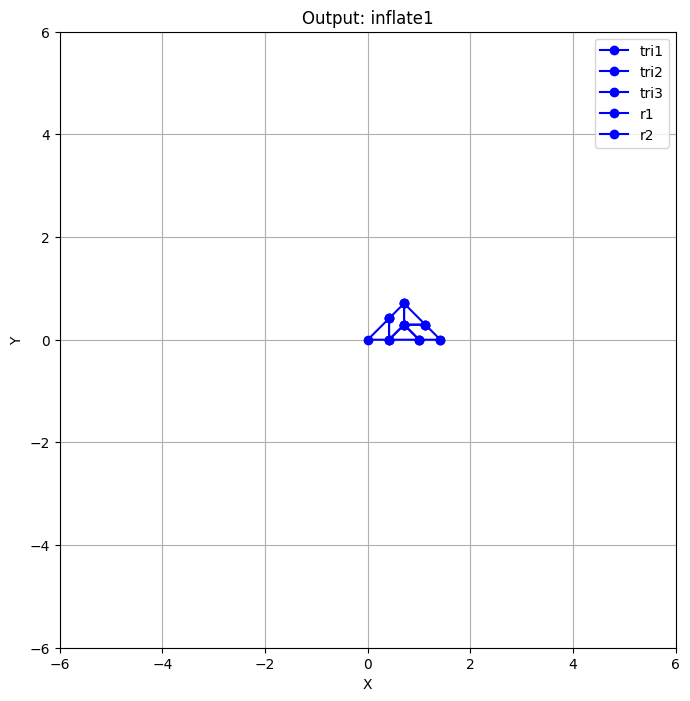

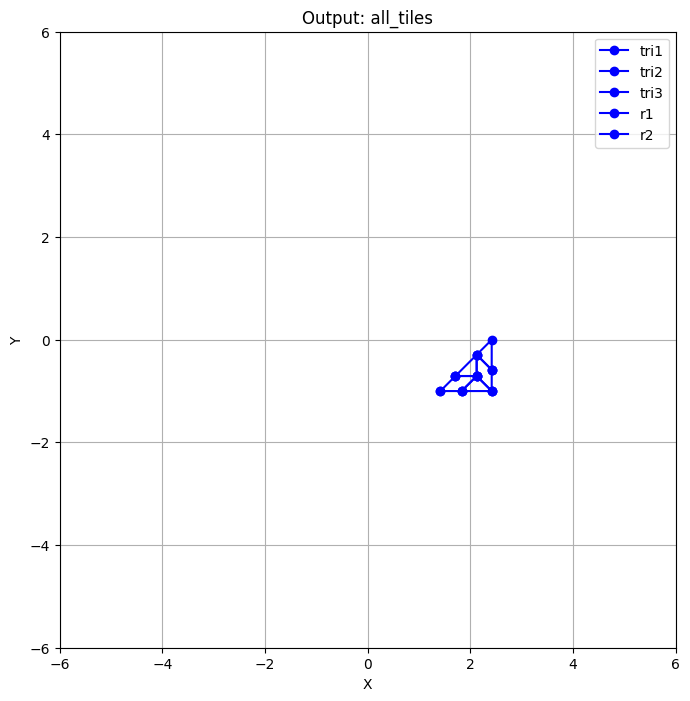

In [34]:
def plot_tile(vertices, label, color='b', marker='o'):
    # Extract x and y coordinates
    x, y = zip(*vertices)
    x = list(x) + [x[0]]  # Close the shape
    y = list(y) + [y[0]]  # Close the shape
    
    plt.plot(x, y, '-'+marker, color=color, label=label)

def visualize_tiles(tiles: List[Tuple[str, List[Tuple[float, float]]]], title: str) -> None:
    """Visualize a list of tiles."""
    plt.figure(figsize=(8, 8))
    
    for tile_data in tiles:
        if len(tile_data) == 2:
            tile_name, vertices = tile_data
        else:
            tile_name = "Unknown"
            vertices = tile_data
        
        plot_tile(vertices, tile_name)
    
    plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the shapes look correct
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)

    plt.show()

# Given input
rrr = [('tri2', [(1.0, 0.0), (0.4142135623730949, 0.0), (0.7071067811865475, 0.2928932188134525)])]

# Assuming you have the inflate_triangle_test function defined
xxx, newt1, inflate1, all_tiles = inflate_triangle_test(rrr, 1)

# Visualize the outputs
visualize_tiles([xxx], 'Output: xxx')
visualize_tiles([newt1], 'Output: newt1')
visualize_tiles(inflate1, 'Output: inflate1')
visualize_tiles(all_tiles, 'Output: all_tiles')


### The complete version of inflate_triangle_iterate

In [35]:
def is_inverted_tri(triangle_vertices):
    x1, y1 = triangle_vertices[0]
    x2, y2 = triangle_vertices[1]
    x3, y3 = triangle_vertices[2]

    area = 0.5 * (x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))

    return area < 0

def compute_rotation_and_scale_tri(triangle1, triangle2):
    # Check if triangle2 is inverted
    if is_inverted_tri(triangle2):
        # Invert triangle2 back
        triangle2 = [triangle2[1], triangle2[0], triangle2[2]]
    
    # Compute vectors for the sides of the triangles
    vec1_triangle1 = np.array(triangle1[1]) - np.array(triangle1[0])
    vec1_triangle2 = np.array(triangle2[1]) - np.array(triangle2[0])
    
    # Normalize the vectors
    vec1_triangle1 = vec1_triangle1 / np.linalg.norm(vec1_triangle1)
    vec1_triangle2 = vec1_triangle2 / np.linalg.norm(vec1_triangle2)
    
    # Compute the dot product and cross product of the normalized vectors
    dot_product = np.dot(vec1_triangle1, vec1_triangle2)
    cross_product = np.cross(vec1_triangle1, vec1_triangle2)
    
    # Compute the angle between the vectors using the dot and cross products
    angle = np.arctan2(cross_product, dot_product)
    
    return angle, triangle2

# Example usage:
triangle_ref = [(0,0), (1,0), (0.5, np.sqrt(3)/2)]
triangle_rotated_and_scaled = [(0,0), (2,-2), (1,-1-np.sqrt(3))]

angle, scale = compute_rotation_and_scale_tri(triangle_ref, triangle_rotated_and_scaled)
print(f"Rotation Angle: {np.degrees(angle)} degrees")
print(f"Scaling Factor: {scale}")


Rotation Angle: 135.0 degrees
Scaling Factor: [(2, -2), (0, 0), (1, -2.732050807568877)]


In [36]:
import numpy as np

def is_inverted_r(vertices):
    n = len(vertices)
    area = 0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1*y2 - x2*y1)
    return area < 0

def compute_rotation_and_scale_rhombus(rhombus1, rhombus2):
    # Check if rhombus2 is inverted
    if is_inverted_r(rhombus2):
        # Invert rhombus2 back
        rhombus2 = [rhombus2[0], rhombus2[3], rhombus2[2], rhombus2[1]]
    
    # Compute vectors for the sides of the rhombuses
    vec1_rhombus1 = np.array(rhombus1[1]) - np.array(rhombus1[0])
    vec1_rhombus2 = np.array(rhombus2[1]) - np.array(rhombus2[0])
    
    # Normalize the vectors
    vec1_rhombus1 = vec1_rhombus1 / np.linalg.norm(vec1_rhombus1)
    vec1_rhombus2 = vec1_rhombus2 / np.linalg.norm(vec1_rhombus2)
    
    # Compute the dot product and cross product of the normalized vectors
    dot_product = np.dot(vec1_rhombus1, vec1_rhombus2)
    cross_product = np.cross(vec1_rhombus1, vec1_rhombus2)
    
    # Compute the angle between the vectors using the dot and cross products
    angle = np.arctan2(cross_product, dot_product)
    
    # Compute the scaling factor
    scale_factor = np.linalg.norm(np.array(rhombus2[1]) - np.array(rhombus2[0])) / np.linalg.norm(np.array(rhombus1[1]) - np.array(rhombus1[0]))
    
    return angle, scale_factor

# Example usage:
rhombus_ref = rhombus((0,0), 1)
print(rhombus_ref)
rhombus_rotated_and_scaled = [(0,0), (2,-2), (3,-3), (1,-1)]

angle, scale = compute_rotation_and_scale_rhombus(rhombus_ref, rhombus_rotated_and_scaled)
print(f"Rotation Angle: {np.degrees(angle)} degrees")
print(f"Scaling Factor: {scale}")

[(0, 0), (1, 0), (1.7071067811865475, 0.7071067811865475), (0.7071067811865475, 0.7071067811865475)]
Rotation Angle: -45.0 degrees
Scaling Factor: 2.8284271247461903


In [37]:
def inflate_triangle(coordinate: Tuple[float, float], l_side)-> List[Tuple[str, List[Tuple[float, float]]]]:
    """according to arXiv:math/0203252, we dissect the triangle into 3 triangles and two rhombus with side length = l_side"""
    vertice_tri = triangle(coordinate, l_side/(1+np.sqrt(2)))
    vertice_rhom = rhombus(coordinate, l_side/(1+np.sqrt(2)))
    #vert_enlarge = [((1+np.sqrt(2))*x, (1+np.sqrt(2))*y) for x, y in vertice_tri] 
    tri1 = [transform_point_ini(i, 5*np.pi/4, l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_tri]
    tri2 = [transform_point_ini(x, 0, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate, invert_y=True) for x in vertice_tri]
    tri3 = [transform_point_ini(y, 3*np.pi/4, (2+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for y in vertice_tri]
    r1 = [transform_point_ini(i, 5*np.pi/4, (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_rhom]
    r2 = [transform_point_ini(x, 3*np.pi/4, (2+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate) for x in vertice_rhom]
    return [[tri1], [tri2], [tri3], [r1] ,[r2]]

In [38]:
def inflate_rhombus(coordinate: Tuple[float, float], l_side) -> List[Tuple[str, List[Tuple[float, float]]]]:
    """according to arXiv:math/0203252, we dissect the rhombus into 4 triangles and 3 rhombus with side length = l_side"""
    vertice_tri = triangle(coordinate, l_side/(1+np.sqrt(2)))
    vertice_rhom = rhombus(coordinate, l_side/(1+np.sqrt(2)))
    tri1 = [transform_point_ini(i, 0, l_side/(1+np.sqrt(2)), 0) for i in vertice_tri]
    tri2 = [transform_point_ini(i, np.pi, (1+3*np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (1+np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_tri]
    tri3 = [transform_point_ini(i, np.pi/4, (2+np.sqrt(2))*l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate, invert_y=True) for i in vertice_tri]
    tri4 = [transform_point_ini(i, 5*np.pi/4, (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), (np.sqrt(2)/2)*l_side/(1+np.sqrt(2)), origin=coordinate, invert_y=True) for i in vertice_tri]
    r1 = [transform_point_ini(i, 0, 0, 0, origin=coordinate) for i in vertice_rhom]
    r2 = [transform_point_ini(i, np.pi/2, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), 0, origin=coordinate) for i in vertice_rhom]
    r3 = [transform_point_ini(i, 0, (1+np.sqrt(2))*l_side/(1+np.sqrt(2)), l_side/(1+np.sqrt(2)), origin=coordinate) for i in vertice_rhom]
    return [[tri1], [tri2], [tri3], [tri4], [r1], [r2], [r3]]

In [39]:
def inflate_iterate_final(tile, ls_initial, number_iterate) -> List[List[Tuple[float, float]]]:
    kk = 0
    vertice_tri = triangle((0,0), ls_initial/(1+np.sqrt(2)))
    vertice_rhom = rhombus((0,0), ls_initial/(1+np.sqrt(2)))
    
    while kk < number_iterate:
        kk += 1
        #print(f"Starting iteration {kk}")

        if isinstance(tile[0], tuple):
            tile = [tile]
        
        inflate_shapes = [([(x*(1+np.sqrt(2))*ls_initial, y*(1+np.sqrt(2))*ls_initial) for x, y in vertices]) for vertices in tile]
        all_tiles = []

        for i, j in enumerate(inflate_shapes):
            #print(f"Processing tile: {j}")  # Debug print
            if len(j) == 3:
                angletri, triangle_c = compute_rotation_and_scale_tri(vertice_tri, j)
                newtri = [reverse_transform_point(p, angletri, 0, 0, triangle_c[0]) for p in j]
                if is_inverted_tri(j):
                    inflatetri = inflate_triangle(newtri[1], ls_initial)
                    inflatetri1 = [[transform_point(p, angletri, 0, 0, j[0], True) for p in shape] for shape_list in inflatetri for shape in shape_list]
                else:
                    inflatetri = inflate_triangle(newtri[0], ls_initial)
                    inflatetri1 = [[transform_point(p, angletri, 0, 0, j[0]) for p in shape] for shape_list in inflatetri for shape in shape_list]
                #print("just after each inflation-triangle(5)",inflatetri)
                #print(len(inflatetri))
                all_tiles.extend(inflatetri1)
            elif len(j) == 4:
                angler, _ = compute_rotation_and_scale_rhombus(vertice_rhom, j)
                newr = [reverse_transform_point(p, angler, 0, 0, j[0]) for p in j]
                inflater = inflate_rhombus(newr[0], ls_initial)
                #print("just after each inflation-rhombus(7)", inflater)
                #print(len(inflater))
                inflater1 = [[transform_point(p, angler, 0, 0, j[0]) for p in shape] for shape_list in inflater for shape in shape_list]
                all_tiles.extend(inflater1)
        
        # Set the tile for the next iteration to the result of the current iteration
        tile = all_tiles
        print("all tiles in each iteration are", tile)
    
    return all_tiles


In [40]:
rrr = [(0.4142135623730951, 0.4142135623730951), (-1.6653345369377348e-16, 0.0), (0.41421356237309503, 0.0)]

In [41]:
a = inflate_iterate_final(rrr, 1, 2)

all tiles in each iteration are [[(0.9999999999999998, 0.41421356237309503), (1.0000000000000002, 1.0000000000000002), (0.7071067811865475, 0.7071067811865477)], [(0.2928932188134522, 0.29289321881345276), (0.7071067811865475, 0.7071067811865477), (0.7071067811865474, 0.29289321881345265)], [(0.4142135623730947, 1.1102230246251565e-16), (0.9999999999999998, 0.0), (0.7071067811865472, 0.29289321881345254)], [(0.9999999999999996, 0.0), (0.9999999999999998, 0.41421356237309515), (0.7071067811865475, 0.7071067811865477), (0.7071067811865474, 0.29289321881345265)], [(-4.440892098500626e-16, 3.3306690738754696e-16), (0.4142135623730947, 1.1102230246251565e-16), (0.7071067811865472, 0.29289321881345254), (0.2928932188134522, 0.29289321881345276)]]
all tiles in each iteration are [[(1.9999999999999996, 1.4142135623730954), (2.4142135623730945, 0.9999999999999998), (2.414213562373095, 1.414213562373095)], [(2.4142135623730954, 2.0), (2.414213562373095, 1.414213562373095), (2.1213203435596424, 1

In [42]:
print(a)

[[(1.9999999999999996, 1.4142135623730954), (2.4142135623730945, 0.9999999999999998), (2.414213562373095, 1.414213562373095)], [(2.4142135623730954, 2.0), (2.414213562373095, 1.414213562373095), (2.1213203435596424, 1.7071067811865475)], [(2.121320343559643, 2.121320343559643), (1.7071067811865475, 1.707106781186548), (2.1213203435596424, 1.7071067811865477)], [(1.7071067811865475, 1.707106781186548), (1.9999999999999996, 1.4142135623730951), (2.414213562373095, 1.414213562373095), (2.1213203435596424, 1.7071067811865475)], [(2.4142135623730954, 2.414213562373095), (2.121320343559643, 2.121320343559643), (2.1213203435596424, 1.7071067811865477), (2.4142135623730954, 2.0)], [(1.2928932188134517, 0.7071067811865479), (0.7071067811865467, 0.707106781186548), (0.9999999999999993, 1.0000000000000004)], [(1.4142135623730945, 1.4142135623730954), (0.9999999999999993, 1.0000000000000004), (1.4142135623730945, 1.0000000000000004)], [(1.707106781186547, 1.2928932188134525), (1.7071067811865468, 

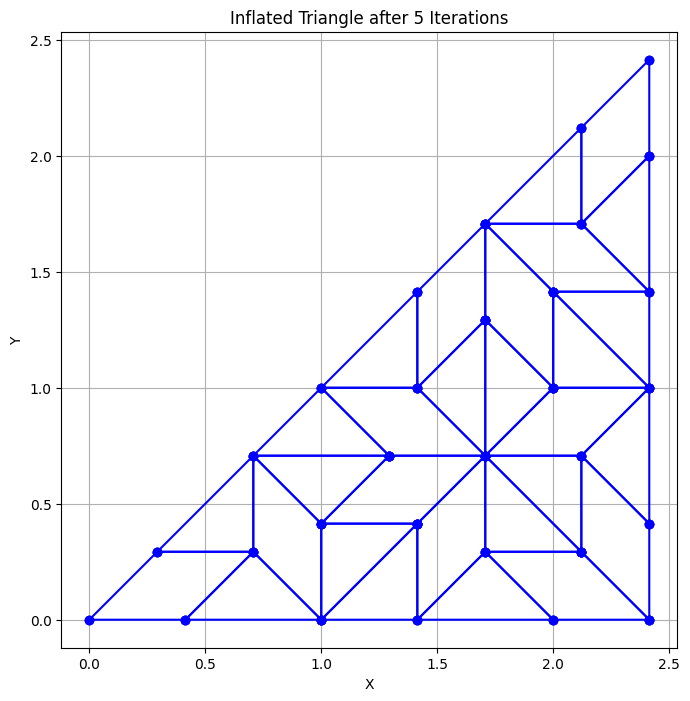

In [43]:
def visualize_tiles(tiles, title=None):
    plt.figure(figsize=(8, 8))
    
    for i, vertices in enumerate(tiles):
        plot_tile(vertices, i)
    
    plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio ensures that the shapes look correct
    plt.xlabel('X')
    plt.ylabel('Y')
    if title:
        plt.title(title)
    #plt.legend()
    plt.grid(True)
    plt.show()

visualize_tiles(a, 'Inflated Triangle after 5 Iterations')

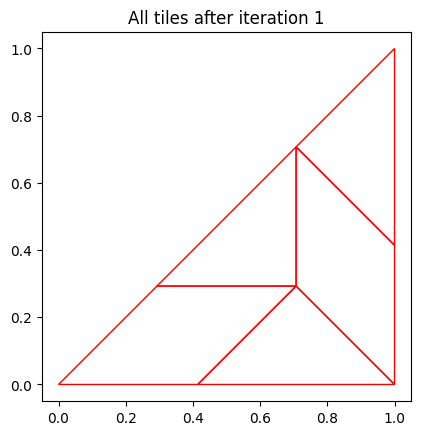

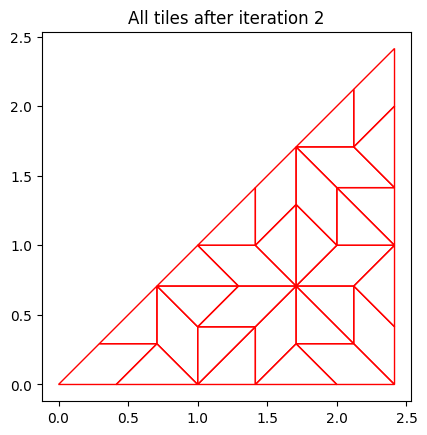

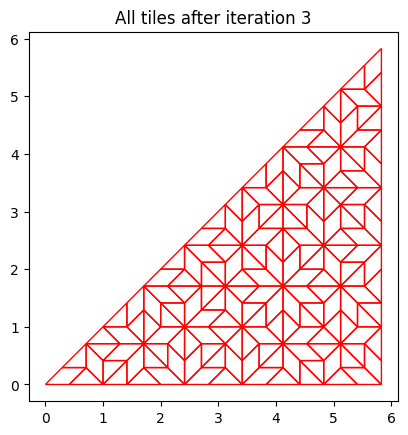

[[(5.414213562373094, 3.414213562373095),
  (4.828427124746189, 3.414213562373096),
  (5.121320343559641, 3.121320343559643)],
 [(5.535533905932736, 2.7071067811865475),
  (5.121320343559641, 3.1213203435596433),
  (5.535533905932736, 3.1213203435596424)],
 [(5.828427124746188, 2.82842712474619),
  (5.828427124746189, 3.414213562373095),
  (5.535533905932736, 3.1213203435596424)],
 [(5.828427124746189, 3.4142135623730945),
  (5.414213562373094, 3.4142135623730954),
  (5.121320343559641, 3.121320343559643),
  (5.535533905932736, 3.1213203435596424)],
 [(5.828427124746188, 2.4142135623730945),
  (5.828427124746188, 2.82842712474619),
  (5.535533905932736, 3.1213203435596424),
  (5.535533905932736, 2.7071067811865475)],
 [(5.414213562373096, 4.414213562373095),
  (5.828427124746191, 4.82842712474619),
  (5.828427124746191, 4.414213562373095)],
 [(5.82842712474619, 3.82842712474619),
  (5.828427124746191, 4.414213562373095),
  (5.535533905932738, 4.121320343559643)],
 [(5.535533905932738, 

In [44]:
def plot_shapes(shapes, title):
    """
    Plots a list of shapes using matplotlib.
    
    Args:
    - shapes (list): A list of shapes, where each shape is a list of (x, y) coordinates.
    - title (str): The title of the plot.
    """
    fig, ax = plt.subplots()
    ax.set_title(title)
    
    for shape in shapes:
        polygon = patches.Polygon(shape, closed=True, fill=None, edgecolor='r')
        ax.add_patch(polygon)
    
    ax.set_aspect('equal')
    ax.autoscale_view()
    plt.show()

def inflate_triangle_iterate_final(tile, ls_initial, number_iterate) -> List[List[Tuple[float, float]]]:
    kk = 0
    vertice_tri = triangle((0,0), ls_initial/(1+np.sqrt(2)))
    vertice_rhom = rhombus((0,0), ls_initial/(1+np.sqrt(2)))
    
    while kk < number_iterate:
        kk += 1
        #print(f"Starting iteration {kk}")

        if isinstance(tile[0], tuple):
            tile = [tile]
        
        inflate_shapes = [([(x*(1+np.sqrt(2))*ls_initial, y*(1+np.sqrt(2))*ls_initial) for x, y in vertices]) for vertices in tile]
        all_tiles = []

        for i, j in enumerate(inflate_shapes):
            #print(f"Processing tile: {j}")
            #plot_shapes([j], f"Tile before inflation: {i}")
            
            if len(j) == 3:
                angletri, triangle_c = compute_rotation_and_scale_tri(vertice_tri, j)
                #print(angletri)
                newtri = [reverse_transform_point(p, angletri, 0, 0, triangle_c[0]) for p in j]
                #plot_shapes([newtri], f"New Triangle: {i}")
                #print(newtri[0])
                if is_inverted_tri(j):
                    inflatetri = inflate_triangle(newtri[1], ls_initial)
                else:
                    inflatetri = inflate_triangle(newtri[0], ls_initial)
                    
                inflatetri_shapes = [shape[0] for shape in inflatetri]  # Extract the shapes
                #plot_shapes(inflatetri_shapes, f"Inflated Triangle: {i}")
                if is_inverted_tri(j):
                    inflatetri1 = [[transform_point(p, angletri, 0, 0, j[0], True) for p in shape] for shape in inflatetri_shapes]
                else:
                    inflatetri1 = [[transform_point(p, angletri, 0, 0, j[0]) for p in shape] for shape in inflatetri_shapes]
                #plot_shapes(inflatetri1, f"Transformed Inflated Triangle: {i}")
                
                all_tiles.extend(inflatetri1)
            elif len(j) == 4:
                angler, _ = compute_rotation_and_scale_rhombus(vertice_rhom, j)
                newr = [reverse_transform_point(p, angler, 0, 0, j[0]) for p in j]
                #plot_shapes([newr], f"New Rhombus: {i}")
                
                inflater = inflate_rhombus(newr[0], ls_initial)
                inflater_shapes = [shape[0] for shape in inflater]  # Extract the shapes
                #plot_shapes(inflater_shapes, f"Inflated Rhombus: {i}")
                
                inflater1 = [[transform_point(p, angler, 0, 0, j[0]) for p in shape] for shape in inflater_shapes]
                #plot_shapes(inflater1, f"Transformed Inflated Rhombus: {i}")
                
                all_tiles.extend(inflater1)
        
        plot_shapes(all_tiles, f"All tiles after iteration {kk}")
        tile = all_tiles
    
    return all_tiles

# Example usage:
initial_tile = rrr
ls_initial = 1
number_of_iterations = 3
inflate_triangle_iterate_final(initial_tile, ls_initial, number_of_iterations)


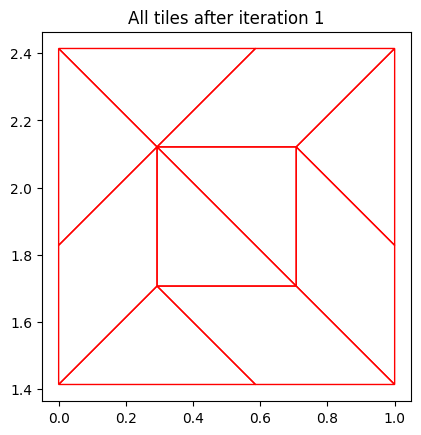

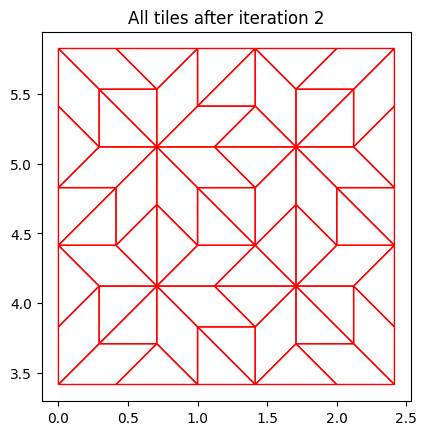

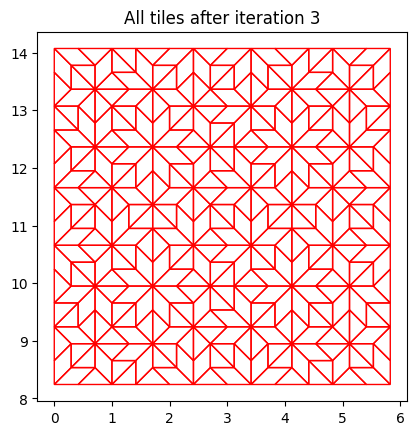

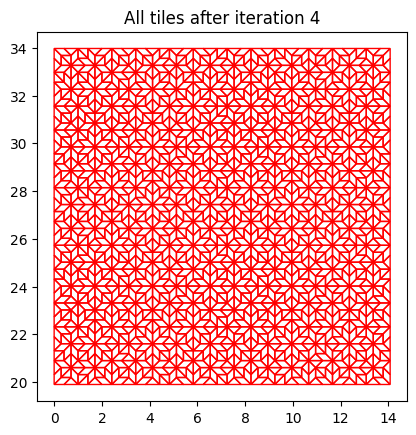

[[(6.2426406871192865, 32.55634918610404),
  (5.828427124746192, 32.970562748477136),
  (5.828427124746192, 32.55634918610404)],
 [(5.828427124746191, 31.970562748477136),
  (5.828427124746192, 32.55634918610404),
  (6.121320343559644, 32.26345596729059)],
 [(6.121320343559644, 31.849242404917494),
  (6.535533905932739, 32.26345596729059),
  (6.121320343559644, 32.26345596729059)],
 [(6.535533905932739, 32.26345596729059),
  (6.2426406871192865, 32.55634918610404),
  (5.828427124746192, 32.55634918610404),
  (6.121320343559644, 32.26345596729059)],
 [(5.828427124746191, 31.55634918610404),
  (6.121320343559644, 31.849242404917494),
  (6.121320343559644, 32.26345596729059),
  (5.828427124746191, 31.970562748477136)],
 [(6.949747468305834, 33.26345596729059),
  (7.535533905932739, 33.26345596729059),
  (7.2426406871192865, 32.970562748477136)],
 [(6.828427124746191, 32.55634918610404),
  (7.2426406871192865, 32.970562748477136),
  (6.828427124746191, 32.970562748477136)],
 [(6.5355339059

In [45]:
# Example usage:
initial_tile = [[(0, 1), (1, 0), (1, 1)], [(0, 1), (1, 0), (0,0)]]
ls_initial = 1
number_of_iterations = 4
inflate_triangle_iterate_final(initial_tile, ls_initial, number_of_iterations)

## Create the quasicrystal tight-binding Hamiltonian

#### Obtain all vertices for the first, second, and third iterations staring from a square

In [46]:
initial_tile = [[(0, 1), (1, 0), (1, 1)], [(0, 1), (1, 0), (0,0)]]
ls_initial = 1
number_of_iterations = 1
one_iteration = inflate_iterate_final(initial_tile, ls_initial, number_of_iterations)

all tiles in each iteration are [[(0.5857864376269051, 2.414213562373095), (-1.1775693440128314e-16, 2.414213562373095), (0.2928932188134525, 2.1213203435596424)], [(0.7071067811865476, 1.7071067811865475), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0, 1.8284271247461898), (1.0, 2.414213562373095), (0.7071067811865477, 2.1213203435596424)], [(1.0000000000000002, 2.414213562373095), (0.585786437626905, 2.414213562373095), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0000000000000002, 1.4142135623730947), (1.0, 1.8284271247461898), (0.7071067811865477, 2.1213203435596424), (0.7071067811865476, 1.7071067811865475)], [(-5.551115123125783e-17, 1.8284271247461898), (-1.1775693440128312e-16, 2.414213562373095), (0.2928932188134524, 2.1213203435596424)], [(0.7071067811865475, 1.7071067811865475), (0.29289321881345237, 2.1213203435596424), (0.2928932188134523, 1.7071067811865475)], [(0.5857864376269049, 1.

In [47]:
initial_tile = [[(0, 1), (1, 0), (1, 1)], [(0, 1), (1, 0), (0,0)]]
ls_initial = 1
number_of_iterations = 2
two_iteration = inflate_iterate_final(initial_tile, ls_initial, number_of_iterations)

all tiles in each iteration are [[(0.5857864376269051, 2.414213562373095), (-1.1775693440128314e-16, 2.414213562373095), (0.2928932188134525, 2.1213203435596424)], [(0.7071067811865476, 1.7071067811865475), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0, 1.8284271247461898), (1.0, 2.414213562373095), (0.7071067811865477, 2.1213203435596424)], [(1.0000000000000002, 2.414213562373095), (0.585786437626905, 2.414213562373095), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0000000000000002, 1.4142135623730947), (1.0, 1.8284271247461898), (0.7071067811865477, 2.1213203435596424), (0.7071067811865476, 1.7071067811865475)], [(-5.551115123125783e-17, 1.8284271247461898), (-1.1775693440128312e-16, 2.414213562373095), (0.2928932188134524, 2.1213203435596424)], [(0.7071067811865475, 1.7071067811865475), (0.29289321881345237, 2.1213203435596424), (0.2928932188134523, 1.7071067811865475)], [(0.5857864376269049, 1.

In [48]:
initial_tile = [[(0, 1), (1, 0), (1, 1)], [(0, 1), (1, 0), (0,0)]]
ls_initial = 1
number_of_iterations = 3
three_iteration = inflate_iterate_final(initial_tile, ls_initial, number_of_iterations)

all tiles in each iteration are [[(0.5857864376269051, 2.414213562373095), (-1.1775693440128314e-16, 2.414213562373095), (0.2928932188134525, 2.1213203435596424)], [(0.7071067811865476, 1.7071067811865475), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0, 1.8284271247461898), (1.0, 2.414213562373095), (0.7071067811865477, 2.1213203435596424)], [(1.0000000000000002, 2.414213562373095), (0.585786437626905, 2.414213562373095), (0.2928932188134524, 2.1213203435596424), (0.7071067811865476, 2.1213203435596424)], [(1.0000000000000002, 1.4142135623730947), (1.0, 1.8284271247461898), (0.7071067811865477, 2.1213203435596424), (0.7071067811865476, 1.7071067811865475)], [(-5.551115123125783e-17, 1.8284271247461898), (-1.1775693440128312e-16, 2.414213562373095), (0.2928932188134524, 2.1213203435596424)], [(0.7071067811865475, 1.7071067811865475), (0.29289321881345237, 2.1213203435596424), (0.2928932188134523, 1.7071067811865475)], [(0.5857864376269049, 1.

In [49]:
def vertices_coordinates(tiles, precision=12):
    # Flatten the list of lists of tuples
    flattened = [coordinate for sublist in tiles for coordinate in sublist]
    # Round the coordinates to the specified precision to avoid floating-point precision issues
    rounded = [(round(x, precision), round(y, precision)) for x, y in flattened]
    # Remove duplicates by converting the list to a set, then back to a list
    unique = list(set(rounded))
    # Sort the list of tuples if needed
    unique.sort(key=lambda x: (x[0], x[1]))
    # Convert the list to a numpy array
    unique_array = np.array(unique)
    return unique_array

In [50]:
tiles = one_iteration

unique_coords = vertices_coordinates(tiles)
print(len(unique_coords))

12


In [51]:
tiles = two_iteration

unique_coords_2 = vertices_coordinates(tiles)
print(len(unique_coords_2))


52


In [52]:
tiles = three_iteration

unique_coords_3 = vertices_coordinates(tiles)
print(len(unique_coords_3))

264


### Now create a tight-binding Hamiltonian of quasicrystal in real space

In [53]:
def distance(coordinate_a: Tuple[float, float], coordinate_b: Tuple[float, float]):
    x_a, y_a = coordinate_a
    x_b, y_b = coordinate_b
    return ((x_b - x_a) ** 2 + (y_b - y_a) ** 2) ** 0.5

#### The Hamiltonian Matrix is defined below

In [54]:
def hamiltonian(hopping_parameter, all_tiles, hopping_distance_max, hopping_distance_min, E_onsite):
    h = np.zeros([len(all_tiles), len(all_tiles)])
    np.fill_diagonal(h, E_onsite)
    for i, coordinate_1 in enumerate(all_tiles):
        for j, coordinate_2 in enumerate(all_tiles):
            if i != j:  # Ensure we're not calculating the distance from a point to itself
                d = distance(coordinate_1, coordinate_2)
                if hopping_distance_min < d <= hopping_distance_max:
                    h[i][j] = hopping_parameter
    return h

### The generation of connectivity (coupling) diagram

In [55]:
def plot_connectivity(all_tiles, hopping_parameter, hopping_distance_min, hopping_distance_max, E_onsite):
    # Create the Hamiltonian matrix
    h = hamiltonian(hopping_parameter, all_tiles, hopping_distance_max, hopping_distance_min, E_onsite)
    
    # Create a graph object
    G = nx.Graph()

    # Add nodes to the graph
    for i, coordinate in enumerate(all_tiles):
        G.add_node(i, pos=coordinate)

    # Add edges to the graph based on the Hamiltonian
    for i, coordinate_1 in enumerate(all_tiles):
        for j, coordinate_2 in enumerate(all_tiles):
            if i != j:  # Ensure we're not calculating the distance from a point to itself
                d = distance(coordinate_1, coordinate_2)
                if hopping_distance_min < d <= hopping_distance_max:
                    if h[i][j] != 0:
                        G.add_edge(i, j)

    # Create a figure before drawing the graph
    plt.figure()
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=False, node_size=10)

    # Adjust the plot
    plt.margins(0.1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('x')
    plt.ylabel('y')

    # Show the plot
    plt.show()


### Examples

#### Example 1: 52 atoms: we have a 52* 52 Hamiltonian Matrix

In [56]:
# Example usage:
all_tiles = unique_coords_2
hopping_parameter = 0.3
hopping_d_max = 1/(1+np.sqrt(2)) +0.1

# connectivity minimum cutoff calculated by the consine rule in the equilateral triangle with 45 degree, 67.5 degree and 67.5 degree.
hopping_d_min = 0.3171 
#hopping_d_min = 0
E_onsite = -0.3

[[-0.3  0.3  0.  ...  0.   0.   0. ]
 [ 0.3 -0.3  0.  ...  0.   0.   0. ]
 [ 0.   0.  -0.3 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.3  0.   0. ]
 [ 0.   0.   0.  ...  0.  -0.3  0.3]
 [ 0.   0.   0.  ...  0.   0.3 -0.3]]
The connectivity (coupling) diagram is shown below (the edges between vertices have non-zero hopping parameters):


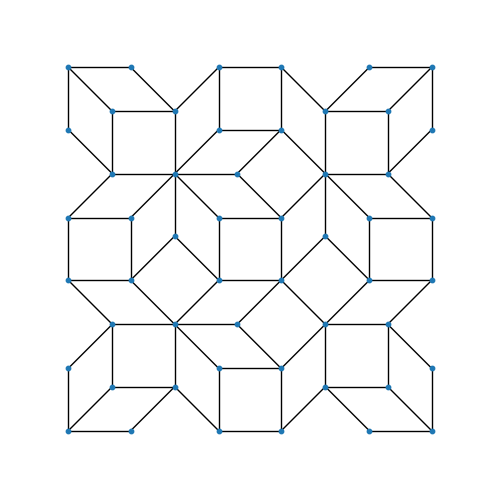

In [57]:
h_matrix = hamiltonian(hopping_parameter, all_tiles, hopping_d_max, hopping_d_min, E_onsite)
print(h_matrix)

print("The connectivity (coupling) diagram is shown below (the edges between vertices have non-zero hopping parameters):")
plot_connectivity(all_tiles, hopping_parameter, hopping_d_min, hopping_d_max, E_onsite)

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(h_matrix)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[-1.45265682e+00  8.52656817e-01 -1.29793128e+00 -1.30443943e+00
  6.97931279e-01  7.04439426e-01 -1.17154834e+00  5.71548345e-01
 -1.07015936e+00  4.70159359e-01 -1.01634255e+00 -9.71718262e-01
 -9.77413832e-01  4.16342549e-01  3.71718262e-01  3.77413832e-01
 -8.83764990e-01 -8.29189241e-01 -8.22657819e-01  2.83764990e-01
  2.29189241e-01  2.22657819e-01  1.66779800e-01 -7.66779800e-01
  9.29188207e-02  7.51631780e-02 -6.92918821e-01 -6.75163178e-01
 -5.26375675e-04 -1.73889540e-02 -5.00191401e-02 -5.99948367e-02
 -7.01491771e-02 -5.99473624e-01 -5.82611046e-01 -5.49980860e-01
 -5.40005163e-01 -5.29850823e-01 -1.23470394e-01 -1.67456850e-01
 -4.76529606e-01 -4.32543150e-01 -3.68660589e-01 -3.46491771e-01
 -3.53320749e-01 -3.51926075e-01 -2.31339411e-01 -2.53508229e-01
 -2.46679251e-01 -2.48073925e-01 -3.00000000e-01 -3.00000000e-01]

Eigenvectors:
[[ 4.00211733e-02  4.00211733e-02 -1.15117430e-01 ...  3.17938174e-02
   1.39752989e-16 -1.76769911e-16]
 [-4.17332281e-02  4.

##### We can vary the nearest neighbour hopping parameters from -3 to 3, and fix the on-site energy

In [65]:
hopping_p = np.linspace(-1, 1, 1000)

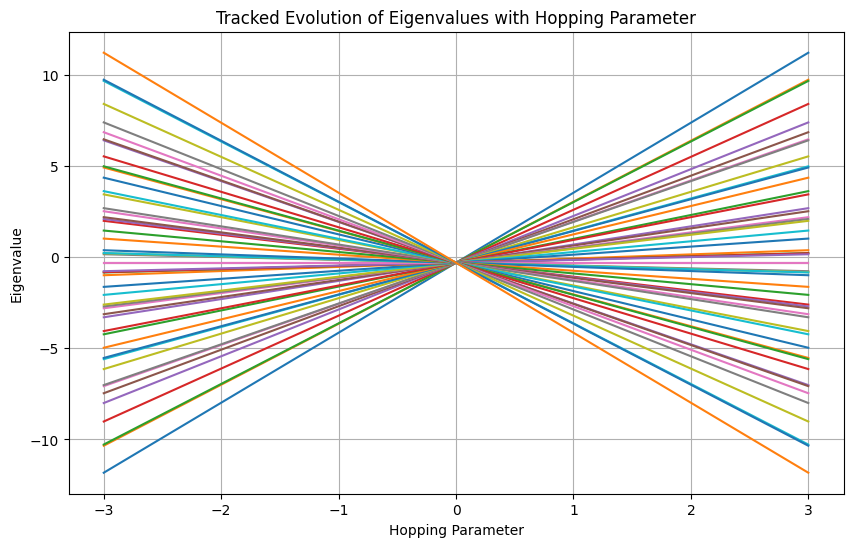

In [60]:
def track_eigenvectors_evolution(hopping_parameters, all_tiles, hopping_distance_max, hopping_distance_min, E_onsite):
    """
    By tracking the order of evolved eigenvectors, reorder the eigenvalues as the hopping parameter is varied.

    Parameters:
    hopping_parameters
    all_tiles -- all coordinates of the tiles
    hopping_distance_max -- Maximum distance for non-zero `hopping_parameter`
    hopping_distance_min -- Minimum distance for non-zero `hopping_parameter`
    E_onsite -- onsite energy
    """
    # Initialise a list to store the tracked eigenvectors and eigenvalues
    tracked_eigenvectors = []
    tracked_eigenvalues = []

    # Iterate over different values of the hopping parameter
    for idx, hopping_parameter in enumerate(hopping_parameters):
        H = hamiltonian(hopping_parameter, all_tiles, hopping_distance_max, hopping_distance_min, E_onsite)
        eigenvalues, eigenvectors = np.linalg.eigh(H)  # eigh ensures that the eigenvectors are orthogonal

        # For the first set of eigenvectors, simply add them to the list
        if idx == 0:
            tracked_eigenvectors.append(eigenvectors)
            tracked_eigenvalues.append(eigenvalues)
        else:
            # Initialize an array to store the overlaps between the current eigenvectors and the tracked eigenvectors from the previous step
            overlaps = np.abs(np.dot(tracked_eigenvectors[-1].T, eigenvectors))
            #print(overlaps)

            #  Find the indices of the current eigenvectors with the maximum overlap with the tracked eigenvectors from the previous step
            idx_max_overlap = np.argmax(overlaps, axis=1)
            #print("The indices of the current eigenvectors with the maximum overlap with the previous eigenvectors are",idx_max_overlap)
            
            # According to these indices, reorder the current eigenvectors and eigenvalues
            tracked_eigenvectors.append(eigenvectors[:, idx_max_overlap])
            tracked_eigenvalues.append(eigenvalues[idx_max_overlap])

    tracked_eigenvalues = np.array(tracked_eigenvalues)

    # Plot the evolution of the tracked eigenvalues
    plt.figure(figsize=(10, 6))
    for i in range(tracked_eigenvalues.shape[1]):
        plt.plot(hopping_parameters, tracked_eigenvalues[:, i], label=f'Tracked Eigenvalue {i+1}')
    plt.xlabel('Hopping Parameter')
    plt.ylabel('Eigenvalue')
    plt.title('Tracked Evolution of Eigenvalues with Hopping Parameter')
    #plt.legend()
    plt.grid(True)
    plt.show()

    return tracked_eigenvalues, tracked_eigenvectors


tracked_eigenvalues, tracked_eigenvectors = track_eigenvectors_evolution(hopping_p, all_tiles, hopping_d_max, hopping_d_min, E_onsite)


c:\Users\11952\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


KeyboardInterrupt: 

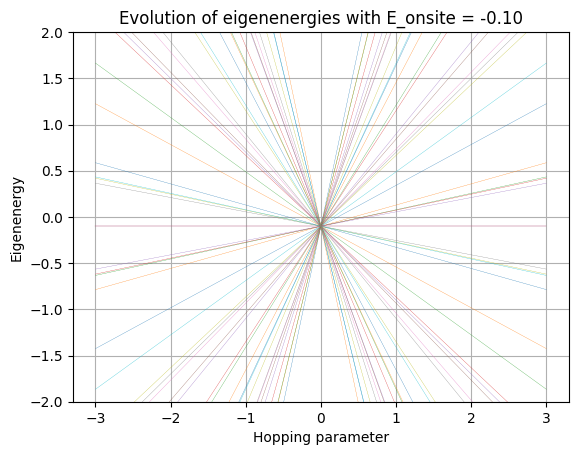

In [61]:
# Define the function that will be called at each frame of the animation
def update(E_onsite):
    global tracked_eigenvalues, tracked_eigenvectors

    # Initialize an array to hold the eigenvalues for each hopping parameter
    eigenenergies = []

    # Iterate over the array of hopping parameters
    for p in hopping_p:
        # Calculate the Hamiltonian matrix for the current hopping parameter and E_onsite
        h_matrix = hamiltonian(p, all_tiles, hopping_d_max, hopping_d_min, E_onsite)
        # Calculate the eigenvalues and eigenvectors of the Hamiltonian matrix
        eigenvalues, eigenvectors = np.linalg.eig(h_matrix)

        # If it's the first frame, initialize the tracking with the sorted eigenvalues and eigenvectors
        if len(tracked_eigenvalues) == 0:
            idx = eigenvalues.argsort()
            tracked_eigenvalues = eigenvalues[idx]
            tracked_eigenvectors = eigenvectors[:, idx]
        else:
            # Initialize an array to store the overlaps between the current eigenvectors and the tracked eigenvectors from the previous step
            overlaps = np.abs(np.dot(tracked_eigenvectors.conj().T, eigenvectors))
            
            # Find the indices of the current eigenvectors with the maximum overlap with the tracked eigenvectors from the previous step
            idx_max_overlap = np.argmax(overlaps, axis=1)
            
            # According to these indices, reorder the current eigenvectors and eigenvalues
            tracked_eigenvectors = eigenvectors[:, idx_max_overlap]
            tracked_eigenvalues = eigenvalues[idx_max_overlap]

        # Append the tracked eigenvalues to the list of eigenenergies
        eigenenergies.append(tracked_eigenvalues)

    # Convert the list of eigenenergies to a NumPy array for easier plotting
    eigenenergies = np.array(eigenenergies)

    # Clear the current axis
    plt.cla()
    # Plot the eigenenergies for each hopping parameter
    for i in range(eigenenergies.shape[1]):
        plt.plot(hopping_p, eigenenergies[:, i], linewidth=0.2)
    
    # Set the labels and title for the plot
    plt.xlabel("Hopping parameter")
    plt.ylabel("Eigenenergy")
    plt.title(f"Evolution of eigenenergies with E_onsite = {E_onsite:.2f}")
    # Set the y-axis limits to a fixed range to ensure the plot doesn't change size
    plt.ylim(-2, 2)
    plt.grid(True)

# Initialize the tracked eigenvalues and eigenvectors
tracked_eigenvalues = []
tracked_eigenvectors = []

# Create the animation
ani = animation.FuncAnimation(plt.gcf(), update, frames=np.arange(-0.1, 0.11, 0.01), interval=500)

# Display the animation
HTML(ani.to_jshtml())


In [62]:
# Example usage:
all_tiles = unique_coords_3

[[-0.3  0.3  0.  ...  0.   0.   0. ]
 [ 0.3 -0.3  0.  ...  0.   0.   0. ]
 [ 0.   0.  -0.3 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... -0.3  0.   0. ]
 [ 0.   0.   0.  ...  0.  -0.3  0.3]
 [ 0.   0.   0.  ...  0.   0.3 -0.3]]
The connectivity (coupling) diagram is shown below (the edges between vertices have non-zero hopping parameters):


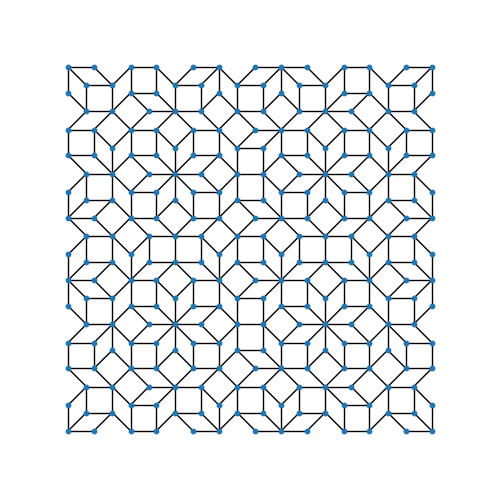

In [63]:
h_matrix = hamiltonian(hopping_parameter, all_tiles, hopping_d_max, hopping_d_min, E_onsite)
print(h_matrix)

print("The connectivity (coupling) diagram is shown below (the edges between vertices have non-zero hopping parameters):")
plot_connectivity(all_tiles, hopping_parameter, hopping_d_min, hopping_d_max, E_onsite)

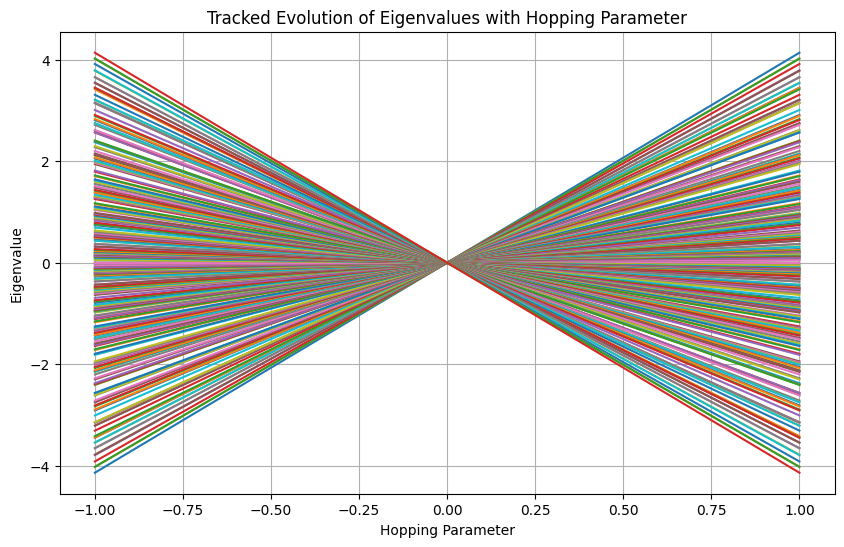

In [66]:
tracked_eigenvalues, tracked_eigenvectors = track_eigenvectors_evolution(hopping_p, all_tiles, hopping_d_max, hopping_d_min, 0)

[ 4.13688496e+00  4.02210975e+00  4.02113603e+00  3.91516019e+00
  3.79021175e+00  3.78087122e+00  3.65477618e+00  3.65411501e+00
  3.54631353e+00  3.54234708e+00  3.44816496e+00  3.44424923e+00
  3.41609350e+00  3.30792744e+00  3.21208670e+00  3.20828194e+00
  3.15135543e+00  3.15073402e+00  3.14184887e+00  3.00914304e+00
  2.91033663e+00  2.89314356e+00  2.83034068e+00  2.81146854e+00
  2.74906468e+00  2.74701785e+00  2.71489466e+00  2.61551297e+00
  2.60710478e+00  2.56664402e+00  2.56653097e+00  2.40689303e+00
  2.40284123e+00  2.38950698e+00  2.37244319e+00  2.29851434e+00
  2.27639786e+00  2.20127230e+00  2.14867263e+00  2.14534152e+00
  2.13067578e+00  2.11931404e+00  2.07200576e+00  2.05409551e+00
  2.00840598e+00  1.99402505e+00  1.98727445e+00  1.96609181e+00
  1.94278600e+00  1.81543473e+00  1.79353707e+00  1.71975511e+00
  1.70524230e+00  1.64121823e+00  1.62421706e+00  1.59337506e+00
  1.55319355e+00  1.50797342e+00  1.48367015e+00  1.48122601e+00
  1.43598949e+00  1.42287

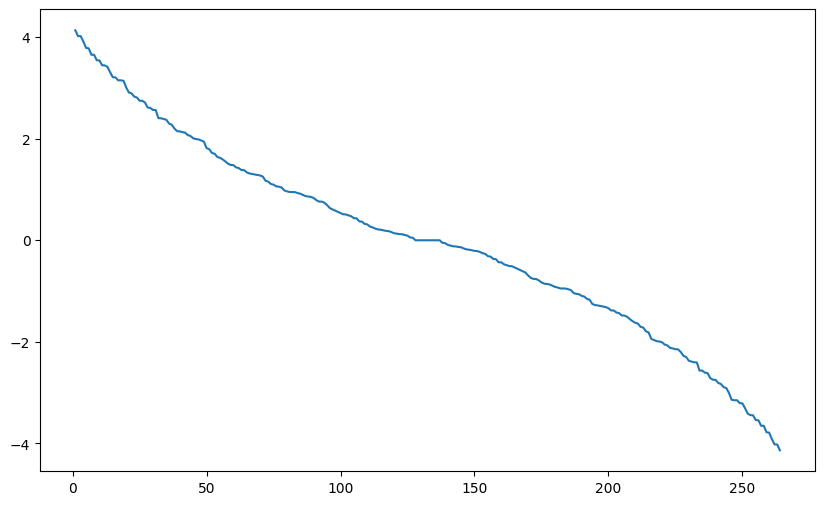

In [80]:
print(tracked_eigenvalues[-1])
plt.figure(figsize=(10, 6))
x = np.arange(1, 265, 1)
print(x)
plt.plot(x, tracked_eigenvalues[-1])